## BEST SELLING BOOKS ANALYSIS
#### INTRODUCTION




**The goal** of this analysis was to analyze book sales data over a number of years to draw insights in python.
The dataset used for this analysis has 6 columns namely,Book,Author(s),Original language,First published,Approximate sales
in millions and Genre. It also has a total of 174 rows,with a few entries missing in the Genre column.

The dataset used for this project was obtained from [kaggle](https://www.kaggle.com/datasets/drahulsingh/best-selling-books/data)



#### DATA COLLECTION

The dataset was in a csv format.I downloaded the dataset to local storage and loaded it into jupyter notebook by passing the file in the parentheses in `pd.read_csv()`. The whole DataFrame was loaded using `.to_string()`

All relevant libraries and modules were imported at the beginning of the analysis

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#reading dataset
books_data=pd.read_csv(r"C:\Users\user\Downloads\Compressed\best-selling-books.csv")
print(books_data.to_string())

                                                                         Book                                   Author(s) Original language  First published  Approximate sales in millions                                                                                            Genre
0                                                        A Tale of Two Cities                             Charles Dickens           English             1859                          200.0                                                                               Historical fiction
1                                         The Little Prince (Le Petit Prince)                    Antoine de Saint-Exupéry            French             1943                          200.0                                                                                          Novella
2                                    Harry Potter and the Philosopher's Stone                               J. K. Rowling           English      

#### DATA EXPLORATION AND CLEANING
Since the DataFrame was already well-structured,I only went through a few steps at this stage
- Checked the column names and few entries from the DataFrame with the `.head()` method
- Checked summary statistics with the `.describe()` method
- Used the `.info()` method to find details such as data types ,non-null values of the DataFrame
- Utilized the `.shape` attribute to check number of rows and columns of the DataFrame. The number of rows tell the number of entries in the DataFrame

- Filled the null entries in the Genre column by passing 'Unknown' in the parentheses in `.fillna()`
- `.duplicated()` to check for duplicates

In [3]:
books_data.head(10)

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga
5,The Hobbit,J. R. R. Tolkien,English,1937,100.0,Fantasy
6,"The Lion, the Witch and the Wardrobe",C. S. Lewis,English,1950,85.0,"Fantasy, Children's fiction"
7,She: A History of Adventure,H. Rider Haggard,English,1887,83.0,Adventure
8,Vardi Wala Gunda (वर्दी वाला गुंडा),Ved Prakash Sharma,Hindi,1992,80.0,Detective
9,The Da Vinci Code,Dan Brown,English,2003,80.0,Mystery thriller


In [4]:
books_data.describe()

,First published,Approximate sales in millions
count,174.000000,174.000000
mean,1962.522989,30.097126
std,64.268737,27.957985
min,1304.000000,10.000000
25%,1947.000000,14.000000
50%,1974.000000,20.000000
75%,1995.000000,36.300000
max,2018.000000,200.000000


In [5]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              174 non-null    object 
 3   First published                174 non-null    int64  
 4   Approximate sales in millions  174 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB


In [6]:
books_data.shape

(174, 6)

In [7]:
books_data.isnull().sum()

Book                              0
Author(s)                         0
Original language                 0
First published                   0
Approximate sales in millions     0
Genre                            56
dtype: int64

In [8]:
books_data['Genre'].fillna('Unknown',inplace=True)

In [9]:
books_data['Genre'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 174 entries, 0 to 173
Series name: Genre
Non-Null Count  Dtype 
--------------  ----- 
174 non-null    object
dtypes: object(1)
memory usage: 1.5+ KB


In [57]:
books_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
169    False
170    False
171    False
172    False
173    False
Length: 174, dtype: bool

### DATA VISUALIZATION

In [10]:
top_selling_books=books_data.sort_values('Approximate sales in millions',ascending=False).head(10)
print('the top 10 selling books are:\n',top_selling_books)

the top 10 selling books are:
                                        Book                 Author(s)  \
0                      A Tale of Two Cities           Charles Dickens   
1       The Little Prince (Le Petit Prince)  Antoine de Saint-Exupéry   
2  Harry Potter and the Philosopher's Stone             J. K. Rowling   
4            Dream of the Red Chamber (紅樓夢)                Cao Xueqin   
5                                The Hobbit          J. R. R. Tolkien   
3                  And Then There Were None           Agatha Christie   
6      The Lion, the Witch and the Wardrobe               C. S. Lewis   
7               She: A History of Adventure          H. Rider Haggard   
8       Vardi Wala Gunda (वर्दी वाला गुंडा)        Ved Prakash Sharma   
9                         The Da Vinci Code                 Dan Brown   

  Original language  First published  Approximate sales in millions  \
0           English             1859                          200.0   
1            French    

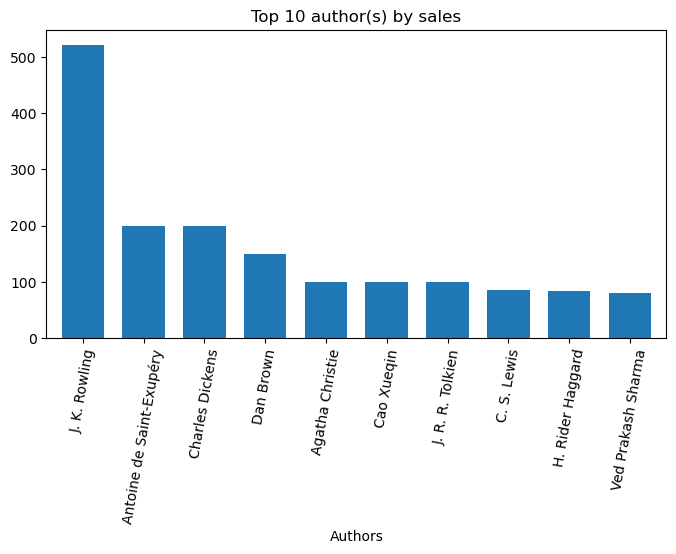

In [46]:
#top author(s) by sales
top_author = books_data.groupby('Author(s)')['Approximate sales in millions'].sum().nlargest(10)
plt.figure(figsize=(8,4))
top_author.plot(kind='bar',width=0.7)
plt.title('Top 10 author(s) by sales')
plt.xlabel('Authors')
#plt.ylabel('Total sales(millions)')
plt.xticks(rotation=80)
plt.show()

Text(0.5, 1.0, 'Book Sales by Year')

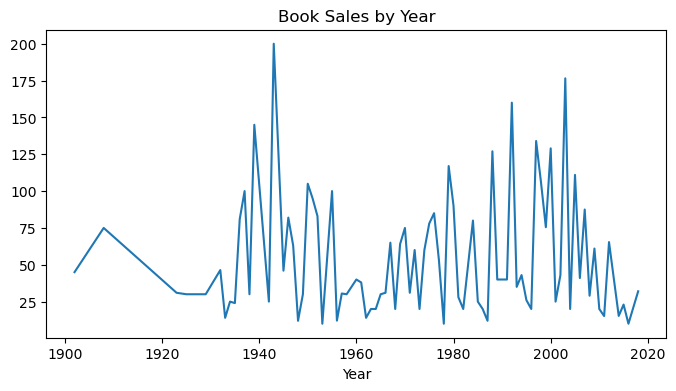

In [45]:
grouping = books_data.groupby('First published')['Approximate sales in millions'].sum().reset_index()
line = grouping.loc[grouping['First published']>=1900]
plt.figure(figsize=(8,4))
x = line['First published']
y = line['Approximate sales in millions']
plt.plot( x, y)
plt.xlabel('Year')
plt.title('Book Sales by Year')

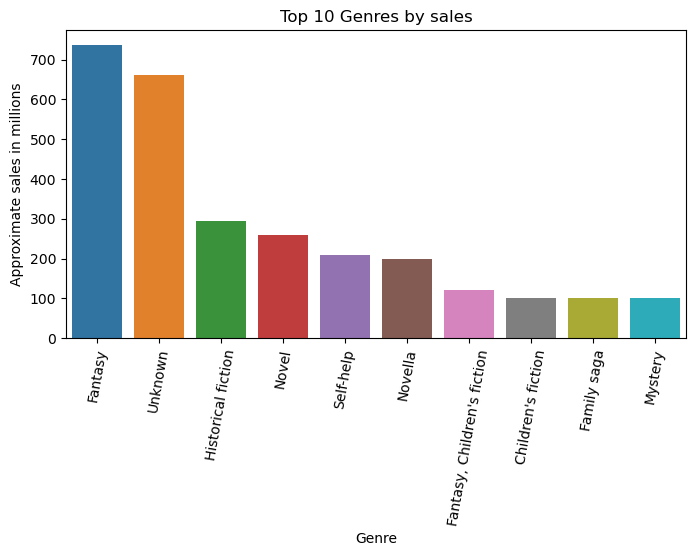

In [61]:
sales_by_genre = books_data.groupby('Genre')['Approximate sales in millions'].sum().reset_index()
top_10_genres = sales_by_genre.nlargest(10, 'Approximate sales in millions')
plt.figure(figsize=(8, 4))
sns.barplot(data=top_10_genres, x='Genre', y='Approximate sales in millions' )
plt.title('Top 10 Genres by sales')
plt.xticks(rotation=80)
plt.show()

C:\Users\user\anaconda3.0\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32005 (\N{CJK UNIFIED IDEOGRAPH-7D05}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3.0\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27155 (\N{CJK UNIFIED IDEOGRAPH-6A13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3.0\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22818 (\N{CJK UNIFIED IDEOGRAPH-5922}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3.0\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3.0\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Us

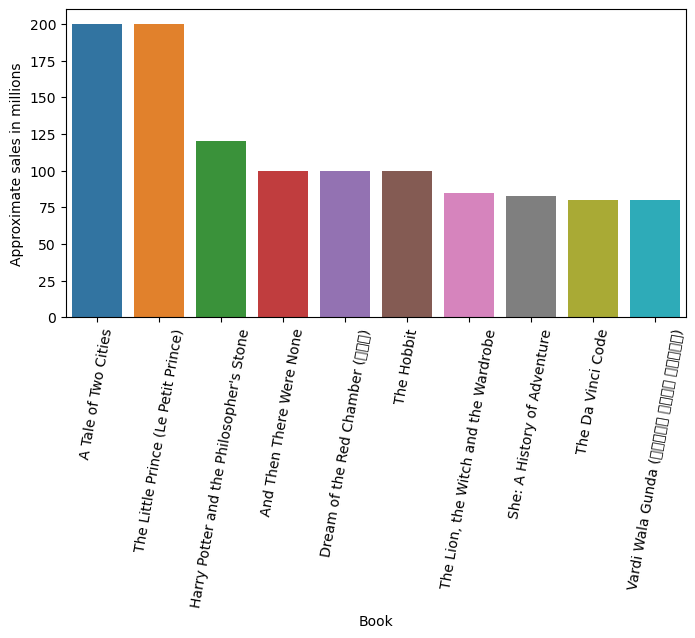

In [48]:
books=books_data.groupby('Book')['Approximate sales in millions'].sum().reset_index()
top_10_books=books.nlargest(10,'Approximate sales in millions')
plt.figure(figsize=(8,4))
sns.barplot(data=top_10_books,x='Book',y='Approximate sales in millions')
plt.xticks(rotation=80)
plt.show()

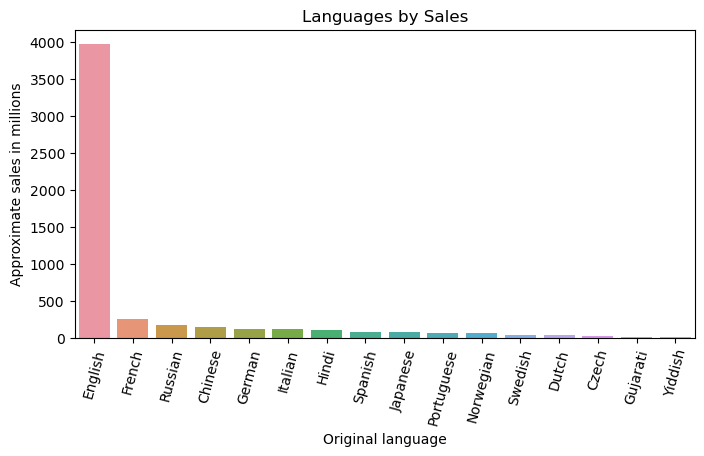

In [62]:
language=books_data.groupby('Original language')['Approximate sales in millions'].sum().reset_index().sort_values('Approximate sales in millions',
                                                                                                                  ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x='Original language',y='Approximate sales in millions',data=language)
plt.title('Languages by Sales')
plt.xticks(rotation=75)
plt.show()

### CONCLUSION

From the analysis,I arrived at a number of conclusions including:
- Most of the best selling books are written in English
- Amongst the top 10 genres,Fantasy has the highest amount of sales
- J.K. Rowling is the author with the highest sales amount
- A Tale of Two Cities and The Little Prince(Le petit prince) are the best selling books amongst the top 10
- There is an observed rising and falling of book sales over the years,with sales peaking in the 1940's and 2000's